# The Support Vector Machine (SVM) Algorithm

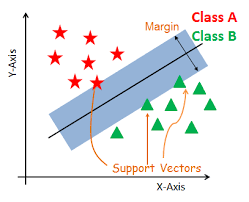

The Support Vector Machine (SVM) algorithm is a supervised machine learning model used for classification and regression tasks. It is particularly effective in high-dimensional spaces and situations where the number of dimensions exceeds the number of samples. The primary goal of SVM is to find the best separating hyperplane that divides the dataset into classes.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PyQt5 
%matplotlib qt

In [19]:
from sklearn import datasets

# Load the iris dataset
iris = sns.load_dataset('iris')

In [20]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
sns.pairplot(iris,hue='species')

In [24]:
setosa=iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'],setosa['sepal_length'],cmap='plasma')

c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

In [ ]:
virginica=iris[iris['species']=='virginica']
sns.kdeplot(virginica['sepal_width'],virginica['sepal_length'],cmap='plasma')

In [ ]:
versicolor=iris[iris['species']=='versicolor']
sns.kdeplot(versicolor['sepal_width'],versicolor['sepal_length'],cmap='plasma')

In [26]:
setosa=iris[iris['species']=='setosa']
sns.scatterplot(setosa['sepal_width'],setosa['sepal_length'],palette='plasma')
virginica=iris[iris['species']=='virginica']
sns.scatterplot(virginica['sepal_width'],virginica['sepal_length'],palette='viridis')
versicolor=iris[iris['species']=='versicolor']
sns.scatterplot(versicolor['sepal_width'],versicolor['sepal_length'],palette='cividis')
plt.show()

c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Nakis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

In [27]:
X = iris.drop(['species'],axis=1)
y = iris['species']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



# Create an SVM classifier
from sklearn import svm

rbfmodel = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
polymodel = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

# Make predictions
poly_pred = polymodel.predict(X_test)
rbf_pred = rbfmodel.predict(X_test)


# Calculate accuracy
from sklearn.metrics import accuracy_score,f1_score

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

print("-"*30)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))


Accuracy (Polynomial Kernel):  100.00
F1 (Polynomial Kernel):  100.00
------------------------------
Accuracy (RBF Kernel):  97.78
F1 (RBF Kernel):  97.79


In [28]:
from sklearn.metrics import confusion_matrix,classification_report
print("Evaluation Metrics For SVM (PolyModel): \n")
print(f"confusion matrix:\n{confusion_matrix(y_test,poly_pred)}")
print("."*30)
print(f"classification report:\n{classification_report(y_test,poly_pred)}")
print("-"*60)
print(f"SVM score :{polymodel.score(X_test,y_test)}")


Evaluation Metrics For SVM (PolyModel): 

confusion matrix:
[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
..............................
classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

------------------------------------------------------------
SVM score :1.0


In [29]:
print("Evaluation Metrics For SVM (RBFModel): \n")
print(f"confusion matrix:\n{confusion_matrix(y_test,rbf_pred)}")
print("."*30)
print(f"classification report:\n{classification_report(y_test,rbf_pred)}")
print("."*30)
print(f"SVM score :{rbfmodel.score(X_test,y_test)}")

Evaluation Metrics For SVM (RBFModel): 

confusion matrix:
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
..............................
classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

..............................
SVM score :0.9777777777777777


In [30]:
df_poly=pd.DataFrame({'Labels':y_test,"Predictions_poly":poly_pred})
print('df_poly:\n',df_poly)

df_poly:
          Labels Predictions_poly
33       setosa           setosa
16       setosa           setosa
43       setosa           setosa
129   virginica        virginica
50   versicolor       versicolor
123   virginica        virginica
68   versicolor       versicolor
53   versicolor       versicolor
146   virginica        virginica
1        setosa           setosa
147   virginica        virginica
32       setosa           setosa
31       setosa           setosa
122   virginica        virginica
127   virginica        virginica
74   versicolor       versicolor
88   versicolor       versicolor
96   versicolor       versicolor
42       setosa           setosa
134   virginica        virginica
80   versicolor       versicolor
48       setosa           setosa
90   versicolor       versicolor
65   versicolor       versicolor
97   versicolor       versicolor
64   versicolor       versicolor
93   versicolor       versicolor
114   virginica        virginica
25       setosa           setosa


In [31]:
df_rbf=pd.DataFrame({'Labels':y_test,"Predictions_RBF":rbf_pred})
print('df_rbf:\n',df_rbf)

df_rbf:
          Labels Predictions_RBF
33       setosa          setosa
16       setosa          setosa
43       setosa          setosa
129   virginica       virginica
50   versicolor      versicolor
123   virginica       virginica
68   versicolor      versicolor
53   versicolor      versicolor
146   virginica       virginica
1        setosa          setosa
147   virginica       virginica
32       setosa          setosa
31       setosa          setosa
122   virginica       virginica
127   virginica       virginica
74   versicolor      versicolor
88   versicolor      versicolor
96   versicolor      versicolor
42       setosa          setosa
134   virginica       virginica
80   versicolor      versicolor
48       setosa          setosa
90   versicolor      versicolor
65   versicolor      versicolor
97   versicolor      versicolor
64   versicolor      versicolor
93   versicolor      versicolor
114   virginica       virginica
25       setosa          setosa
41       setosa          setosa